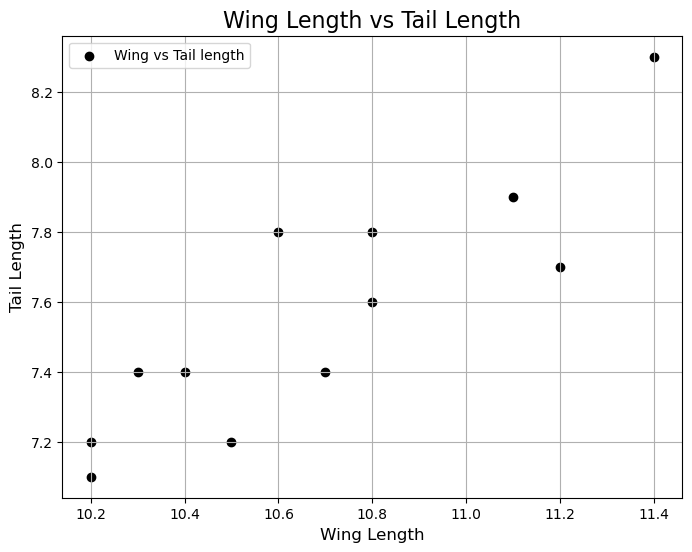

In [32]:
#load
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.power import NormalIndPower


# Define the data for Wing length (X) and Tail length (Y)
wing_length = [10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4]
tail_length = [7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3]

# Plot wing vs tail length
plt.figure(figsize=(8, 6))
plt.scatter(wing_length, tail_length, color='black', label="Wing vs Tail length")
plt.title('Wing Length vs Tail Length', fontsize=16)
plt.xlabel('Wing Length', fontsize=12)
plt.ylabel('Tail Length', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [23]:
#calculate rx,y and ry,x manually

#calc means
mean_x = np.mean(wing_length)
mean_y = np.mean(tail_length)

# Calculation of r(X,Y)
numerator_xy = np.sum((wing_length - mean_x) * (tail_length - mean_y))
denominator_xy = np.sqrt(np.sum((wing_length - mean_x)**2) * np.sum((tail_length - mean_y)**2))
r_xy_manual = numerator_xy / denominator_xy


# Calculation of r(Y,X) (should be the same)
numerator_yx = np.sum((tail_length - mean_y) * (wing_length - mean_x))
denominator_yx = np.sqrt(np.sum((tail_length - mean_y)**2) * np.sum((wing_length - mean_x)**2))
r_yx_manual = numerator_yx / denominator_yx

r_xy_manual, r_yx_manual


(0.8703545613058226, 0.8703545613058226)

In [19]:
# Using numpy's corrcoef function
r_xy_numpy = np.corrcoef(wing_length, tail_length)[0, 1]
r_yx_numpy = np.corrcoef(tail_length, wing_length)[0, 1]

r_xy_numpy, r_yx_numpy

(0.8703545613058227, 0.8703545613058227)

In [21]:
#SE of rx,y; 95% CI computed from SE?

# Calculate Pearson correlation coefficient
r_xy = np.corrcoef(wing_length, tail_length)[0, 1]

# count n
n = len(wing_length)

#SE of rx,y
SE = np.sqrt((1 - r_xy**2) / (n - 2))

#95% CI
Z = 1.96  # for 95% confidence
lower_ci = r_xy - Z * SE
upper_ci = r_xy + Z * SE

r_xy, SE, (lower_ci, upper_ci)

(0.8703545613058227,
 0.15571863652567375,
 (0.5651460337155021, 1.1755630888961432))

In [27]:
#rx,y significant? - calc ttest ; run two-tailed test

#wing and tail length
wing_length = np.array([10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4])
tail_length = np.array([7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3])

#Pearson correlation coefficient
r_xy = np.corrcoef(wing_length, tail_length)[0, 1]

#n
n = len(wing_length)

#t-statistic
t_stat = (r_xy * np.sqrt(n - 2)) / np.sqrt(1 - r_xy**2)

#df
df = n - 2

#crit t-value for a two-tailed test at p < 0.05
critical_t = stats.t.ppf(1 - 0.025, df)  # Two-tailed, so use 0.025

#calculate p-value
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))  # Two-tailed test

#results
t_stat, critical_t, p_value

#correlation between wing and tail length is stat signficant (p <0.05 and |tstat| > |tcrit|)


(5.589276792584329, 2.2281388519649385, 0.00023110594312059085)

In [31]:
#Evaluate H0: r = 0,75

#wing and tail length
wing_length = np.array([10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4])
tail_length = np.array([7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3])

#Pearson correlation coefficient
r_xy = np.corrcoef(wing_length, tail_length)[0, 1]

#n
n = len(wing_length)

#H0 value
r_null = 0.75

#test statistic for H0: r = 0.75
t = (r_xy - r_null) * np.sqrt(n - 2) / np.sqrt(1 - r_null**2)

#df
df = n - 2

#p-value (two-tailed)
p_value = 2 * (1 - stats.t.cdf(np.abs(t), df))

#critical value for two-tailed test at alpha = 0.05
alpha = 0.05
critical_value = stats.t.ppf(1 - alpha/2, df)

#output results
print(f"Calculated Pearson correlation coefficient (r): {r_xy:.4f}")
print(f"Calculated t-statistic: {t:.4f}")
print(f"Degrees of freedom: {df}")
print(f"P-value: {p_value:.4f}")
print(f"Critical value: {critical_value:.4f}")

# Decision based on p-value
if p_value < alpha:
    print("Reject the null hypothesis (H0).")
else:
    print("Fail to reject the null hypothesis (H0).")
    
#fail to reject - correlation coefficient is not statistically sig from 0.75 for wing and tail length

Calculated Pearson correlation coefficient (r): 0.8704
Calculated t-statistic: 0.5754
Degrees of freedom: 10
P-value: 0.5777
Critical value: 2.2281
Fail to reject the null hypothesis (H0).


In [34]:
#calc stats power and sample size needed -> did this in chatgpt idk hehe

#parameters
alpha = 0.05  # significance level
desired_power = 0.80  # desired power
r0 = 0  # null hypothesis correlation
r1 = 0.5  # true correlation (minimum of interest)

#cohen's q
effect_size = np.arctanh(r1) - np.arctanh(r0)

#power analysis
power_analysis = NormalIndPower()


# Calculate required sample size
required_sample_size = power_analysis.solve_power(effect_size=effect_size, alpha=alpha, power=desired_power)

print(f"Required sample size to achieve power of {desired_power} when r >= {r1}: {int(np.ceil(required_sample_size))}")

# Calculate power for the calculated sample size
n = int(np.ceil(required_sample_size))  # use the calculated sample size
calculated_power = power_analysis.solve_power(effect_size=effect_size, nobs=n, alpha=alpha)

print(f"Calculated power for sample size {n} when r >= {r1}: {calculated_power:.4f}")


Required sample size to achieve power of 0.8 when r >= 0.5: 53


TypeError: NormalIndPower.solve_power() got an unexpected keyword argument 'nobs'